In [480]:
import sys
sys.path.append("..")

In [481]:
import numpy as np
import scipy.interpolate
import matplotlib.pyplot as plt
from pyFDA import bspline, gaussNewton
from pyFDA.register import localRegression

In [154]:
reload(gaussNewton)
reload(localRegression)

<module 'pyFDA.register.localRegression' from '../pyFDA/register/localRegression.py'>

In [482]:
%matplotlib inline

In [483]:
def gFunction(t,theta):
	return np.exp(theta[0]) *(t+theta[1])

# Example 1 

In [487]:
n = 200
t = np.linspace(0,6,n)

theta1points = .01*((t-3)**2 - 9)
theta1 = bspline.Bspline(t,theta1points)
h = gFunction(t,[theta1(t),0,0])
hspline = bspline.Bspline(t,h)

x = np.cos(t**3/(np.pi**2))
y = np.cos(hspline(t)**3/(np.pi**2))

## $h^{-1} \approx t(h(t))$ :

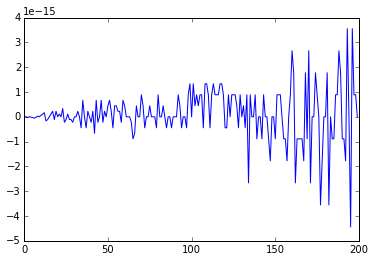

In [521]:
hinv = bspline.Bspline(h,t)
plt.plot(hinv(hspline(t))-t)

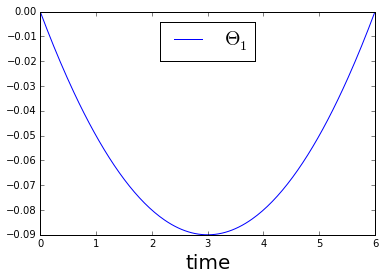

In [490]:
plt.plot(t,theta1(t),label="$\Theta_1$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

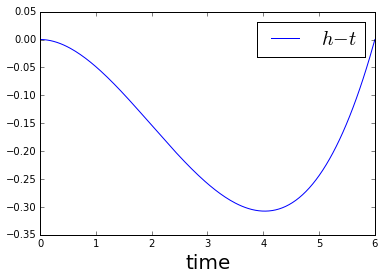

In [491]:
plt.plot(t,h-t,label="$h-t$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

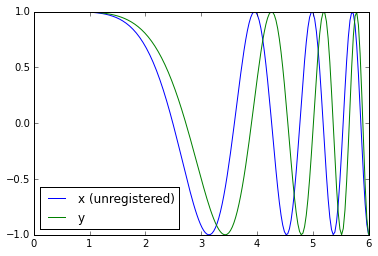

In [492]:
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,label="y")
plt.legend(loc="best")

In [512]:
lr = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/16,decay=True)
lr.run(10)

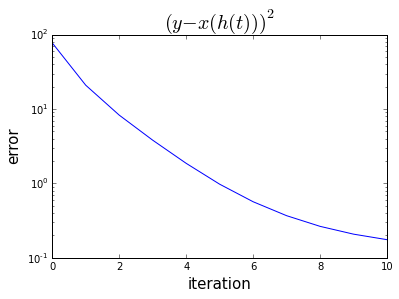

In [517]:
plt.semilogy(lr.error,)
plt.title("$(y - x(h(t)))^2$",fontsize=20)
plt.ylabel("error",fontsize=15)
plt.xlabel("iteration",fontsize=15)

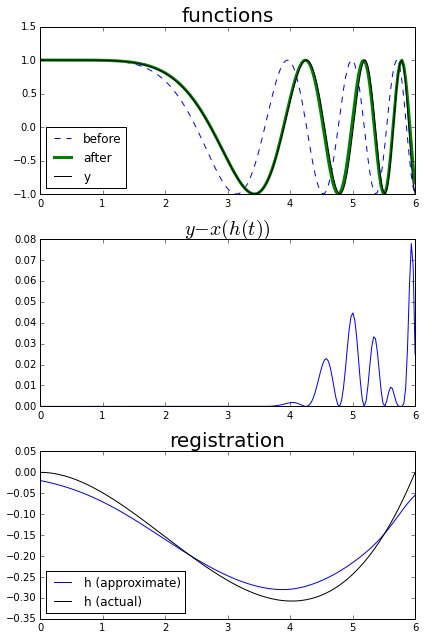

In [511]:
plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr.xhats[0](t),'b--',label='before');
plt.plot(t,lr.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()

# Example 2 

In [518]:
n = 200
t = np.linspace(0,6,n)

theta1points = np.array([(0,0),(2,-.1),(4,.01),(6,0)])
theta1 = bspline.Bspline(theta1points[:,0],theta1points[:,1])
h = gFunction(t,[theta1(t),0,0])
hspline = bspline.Bspline(t,h)

x = np.cos(t**3/(np.pi**2))
y = np.cos(hspline(t)**3/(np.pi**2))

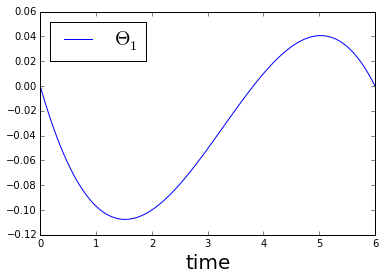

In [520]:
plt.plot(t,theta1(t),label="$\Theta_1$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

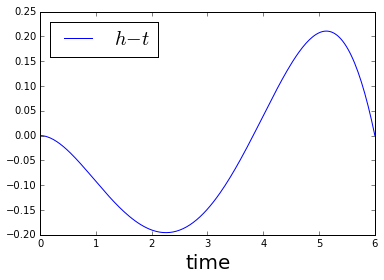

In [522]:
plt.plot(t,h-t,label="$h-t$")
plt.legend(loc="best",fontsize=20)
plt.xlabel("time",fontsize=20)

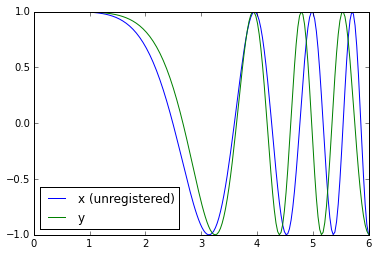

In [519]:
plt.plot(t,x,label="x (unregistered)")
plt.plot(t,y,label="y")
plt.legend(loc="best")

In [523]:
lr2 = localRegression.RegisterLocalRegression(x,y,t,bandwidth=np.pi,ridge=n/16,decay=True)
lr2.run(10)

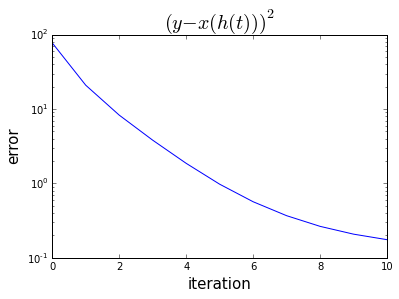

In [524]:
plt.semilogy(lr.error,)
plt.title("$(y - x(h(t)))^2$",fontsize=20)
plt.ylabel("error",fontsize=15)
plt.xlabel("iteration",fontsize=15)

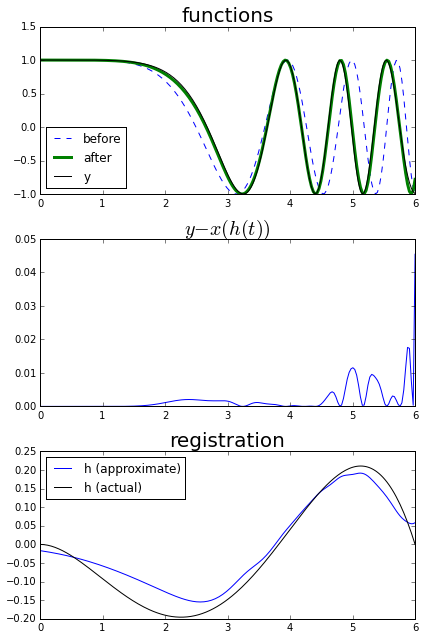

In [525]:
plt.figure(figsize=(6,9))

plt.subplot(311)
plt.title("functions",fontsize=20)
plt.plot(t,lr2.xhats[0](t),'b--',label='before');
plt.plot(t,lr2.xhats[-1](t),'g',label='after',linewidth=3);
plt.plot(t,y,'k',linewidth=1,label='y');
plt.legend(loc="best")

plt.subplot(312)
plt.title("$y - x(h(t))$",fontsize=20)
plt.plot(t,(lr2.xspline(t)-y)**2);

plt.subplot(313)
plt.title("registration",fontsize=20)
plt.plot(t,lr2.h()(t)-t,label="h (approximate)")
plt.plot(t,h-t,'k',label="h (actual)")
plt.legend(loc="best")

plt.tight_layout()